# Create a crowd of pedestrians with custom statistics

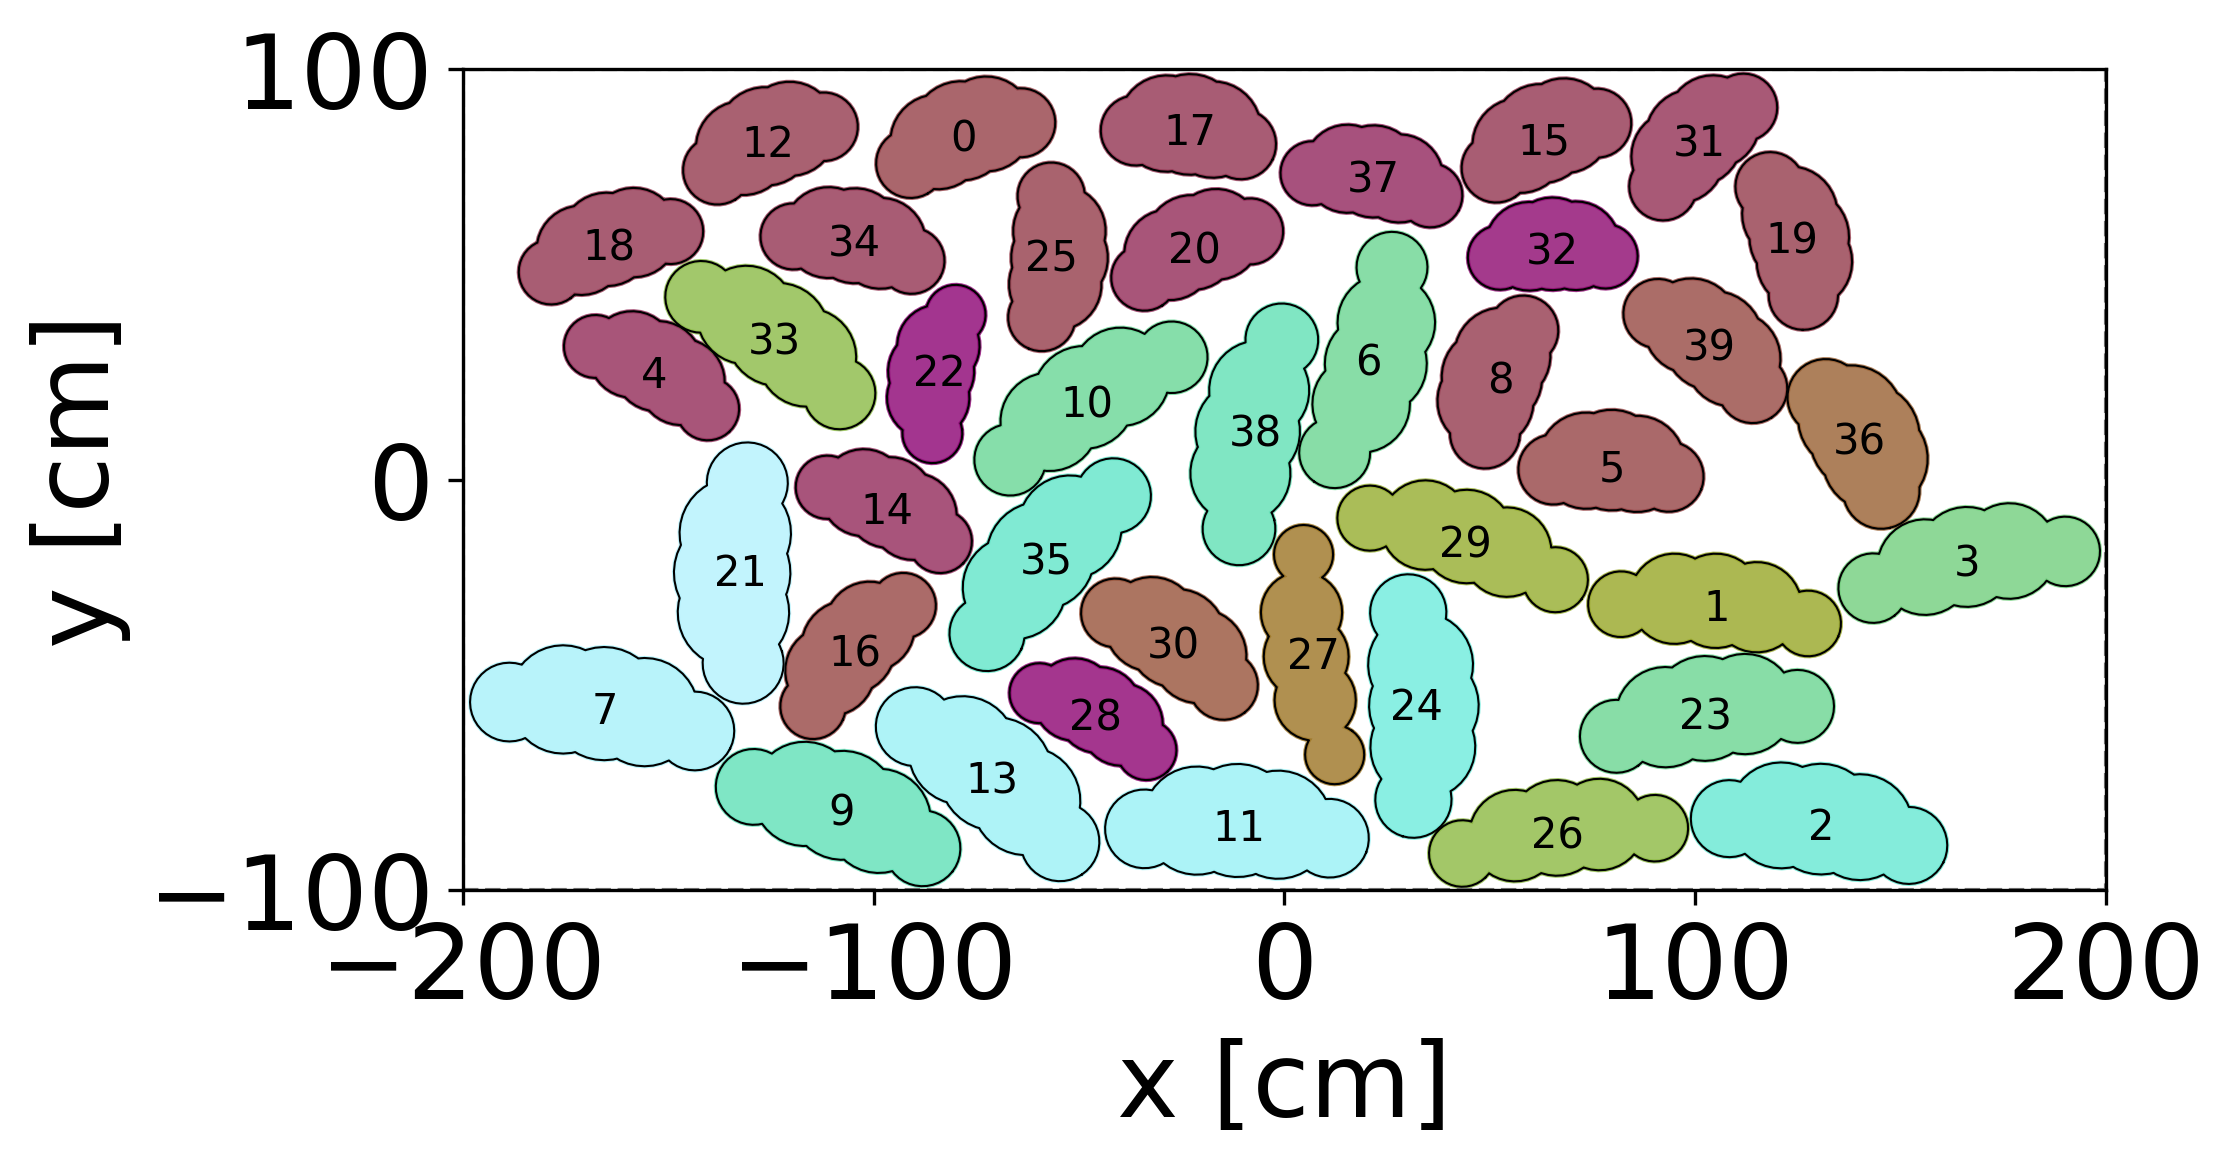

In [2]:
import matplotlib.pyplot as plt
from streamlit_app.plot import plot
from shapely.geometry import Polygon
from pathlib import Path

import configuration.utils.constants as cst
import configuration.backup.crowd_to_zip_and_reverse as fun_zip
from configuration.models.crowd import Crowd
from configuration.models.measures import CrowdMeasures

%matplotlib inline

# Constants
boundaries = Polygon([(-200.0, -100.0), (200.0, -100.0), (200.0, 100.0), (-200.0, 100.0)])  # (cm)
NUMBER_AGENTS: int = 40
REPULSION_LENGTH: float = 5.0  # (cm)
DESIRED_DIRECTION: float = 90.0  # (degrees)
RANDOM_PACKING: bool = True
agent_statistics = cst.CrowdStat.copy()

# Update the agent statistics dictionary with custom values
agent_statistics.update(
    {
        "male_proportion": 0.3,
        "male_bideltoid_breadth_mean": 70.0,  # cm
        "male_bideltoid_breadth_std_dev": 3.0,  # cm
    }
)

# Create the packed crowd
crowd_measures = CrowdMeasures(agent_statistics=agent_statistics)
crowd = Crowd(boundaries=boundaries, measures=crowd_measures)
crowd.create_agents(number_agents=NUMBER_AGENTS)
crowd.pack_agents_with_forces(repulsion_length=REPULSION_LENGTH, desired_direction=DESIRED_DIRECTION, random_packing=RANDOM_PACKING)

# Visualize results
plot.display_crowd2D(crowd)
plt.show()

# Download the xml configuration files necessary for the simulation to a zip format
output_zip_path = Path.cwd().parent.parent.parent / "data" / "xml" / "crowd_custom.zip"
fun_zip.save_crowd_data_to_zip(crowd, output_zip_path)

## Get some anthropometric statistics from the created crowd

In [4]:
import configuration.utils.functions as fun
import pprint

crowd_statistics = crowd.get_crowd_statistics()

# Print the crowd statistics
pprint.pprint(fun.filter_dict_by_not_None_values(crowd_statistics["measures"]))

{'bike_proportion': 0.0,
 'female_bideltoid_breadth_max': 48.84791948221626,
 'female_bideltoid_breadth_mean': 45.06321091339945,
 'female_bideltoid_breadth_min': 41.35462965217929,
 'female_bideltoid_breadth_std_dev': 1.6919214735024568,
 'female_chest_depth_max': 26.789183074352337,
 'female_chest_depth_mean': 23.4333521700292,
 'female_chest_depth_min': 20.979138397900883,
 'female_chest_depth_std_dev': 1.3129184721662295,
 'female_height_max': 177.31615004098558,
 'female_height_mean': 162.20378090196888,
 'female_height_min': 150.8207439826427,
 'female_height_std_dev': 7.12625539113641,
 'female_weight_max': 91.12800155124205,
 'female_weight_mean': 68.94677465622976,
 'female_weight_min': 54.30025495329867,
 'female_weight_std_dev': 10.628430804093691,
 'male_bideltoid_breadth_max': 64.90501662031403,
 'male_bideltoid_breadth_mean': 63.42398818487344,
 'male_bideltoid_breadth_min': 58.554447877936,
 'male_bideltoid_breadth_std_dev': 1.502770838219833,
 'male_chest_depth_max': 28